## Carolina Panthers Salary Distribution Analysis

This analysis examines how the Carolina Panthers allocate their spending on players and compares the data to the rest of the NFL. By focusing on average per-year salary (APY) and breaking it down by position, we can better understand where the Panthers are investing their resources and how it compares to league-wide spending.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
db = pd.read_csv("contracts.csv")

## Introducing the Data

The data comes from OverTheCap via nflreadr (R package) and includes contract details for all NFL players, active and inactive. For this analysis, I’ve filtered out inactive contracts, so only active contracts are included. The dataset was filtered to create two subsets: Panthers-only and the NFL overall. The key fields utilized were player (name), position, and team.

In [2]:
db.columns

Index(['player', 'position', 'team', 'is_active', 'year_signed', 'years',
       'value', 'apy', 'guaranteed', 'apy_cap_pct', 'inflated_value',
       'inflated_apy', 'inflated_guaranteed', 'player_page', 'otc_id',
       'gsis_id', 'date_of_birth', 'height', 'weight', 'college', 'draft_year',
       'draft_round', 'draft_overall', 'draft_team', 'cols'],
      dtype='object')

## Visualizing panthers salary allocation per position

In [3]:
panthersdb = db[db["team"] == "Panthers"]

Filtered out inactive contracts (players that have since signed new contracts or are no longer playing in the NFL).

In [19]:
panthersdb = panthersdb[panthersdb["is_active"] == True]

In [6]:
panthersdb

,player,position,team,is_active,year_signed,years,value,apy,guaranteed,apy_cap_pct,...,gsis_id,date_of_birth,height,weight,college,draft_year,draft_round,draft_overall,draft_team,cols
225,Bryce Young,QB,Panthers,True,2023,4.0,37.955074,9.488769,37.955074,0.042,...,00-0039150,NaN,"5'10""",204.0,Alabama,2023.0,1.0,1.0,Panthers,NaN
407,Andy Dalton,QB,Panthers,True,2025,2.0,8.000000,4.000000,6.000000,0.014,...,00-0027973,NaN,"6'2""",220.0,TCU,2011.0,2.0,35.0,Bengals,NaN
1805,Hendon Hooker,QB,Panthers,True,2025,1.0,0.234000,0.234000,0.000000,0.001,...,00-0038550,NaN,"6'3""",217.0,Tennessee,2023.0,3.0,68.0,Lions,NaN
2135,Chuba Hubbard,RB,Panthers,True,2024,4.0,33.200000,8.300000,12.058000,0.032,...,00-0036555,NaN,"6'0""",208.0,Oklahoma State,2021.0,4.0,126.0,Panthers,NaN
2364,Rico Dowdle,RB,Panthers,True,2025,1.0,2.750000,2.750000,2.750000,0.010,...,00-0036139,NaN,"5'11""",195.0,South Carolina,2020.0,NaN,NaN,Cowboys,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44387,Demani Richardson,S,Panthers,True,2024,2.0,1.755000,0.877500,0.000000,0.003,...,00-0039601,NaN,"6'1""",215.0,Texas A&M,2024.0,NaN,NaN,Panthers,NaN
45562,Trevian Thomas,S,Panthers,True,2025,1.0,0.234000,0.234000,0.000000,0.001,...,00-0040295,NaN,"5'11""",196.0,Arkansas State,2025.0,NaN,NaN,Panthers,NaN
46374,Ryan Fitzgerald,K,Panthers,True,2025,3.0,2.980000,0.993333,0.145000,0.004,...,00-0040279,NaN,"6'1""",190.0,Florida State,2025.0,NaN,NaN,Panthers,NaN
46931,Sam Martin,P,Panthers,True,2025,1.0,1.600000,1.600000,1.600000,0.006,...,00-0030092,NaN,"6'1""",205.0,Appalachian State,2013.0,5.0,165.0,Lions,NaN


In [7]:
position_colors = {
    "QB": "red",
    "RB": "green",
    "WR": "blue",
    "TE": "purple",
    "LT": "orange",
    "LG": "darkorange",
    "C": "gold",
    "RG": "navajowhite",
    "RT": "peru",
    "EDG": "brown",
    "IDL": "saddlebrown",
    "LB": "pink",
    "CB": "cyan",
    "S": "magenta",
    "K": "gray",
    "P": "yellow"
}


In [15]:
panthers_salary = panthersdb.groupby("position")["apy"].sum()

Text(0.5, 1.0, 'Panthers Salary Distribution by Position')

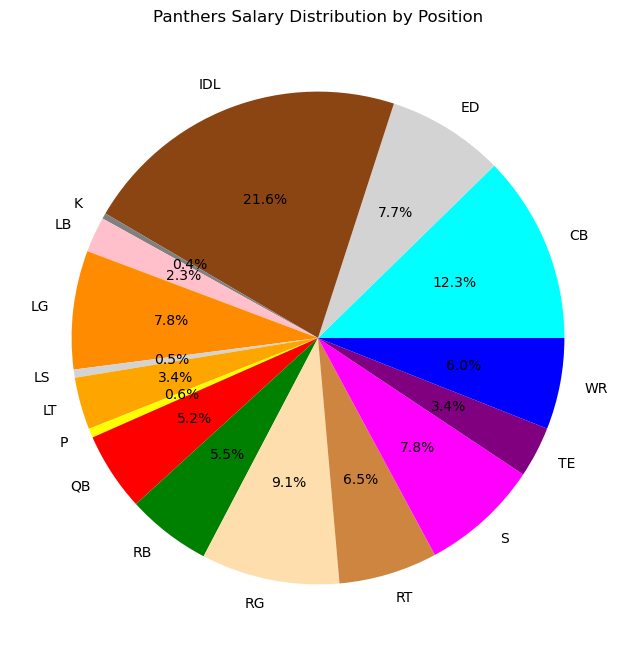

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(
    panthers_salary,
    labels=panthers_salary.index,
    colors=[position_colors.get(pos, "lightgray") for pos in panthers_salary.index],
    autopct="%1.1f%%",
)
plt.title("Panthers Salary Distribution by Position")

## Comparing to NFL salary allocation per position

In [20]:
active_nfl = db[db["is_active"] == True]

In [22]:
nfl_salary = active_nfl.groupby("position")["apy"].sum()

Text(0.5, 1.0, 'NFL Salary Distribution by Position')

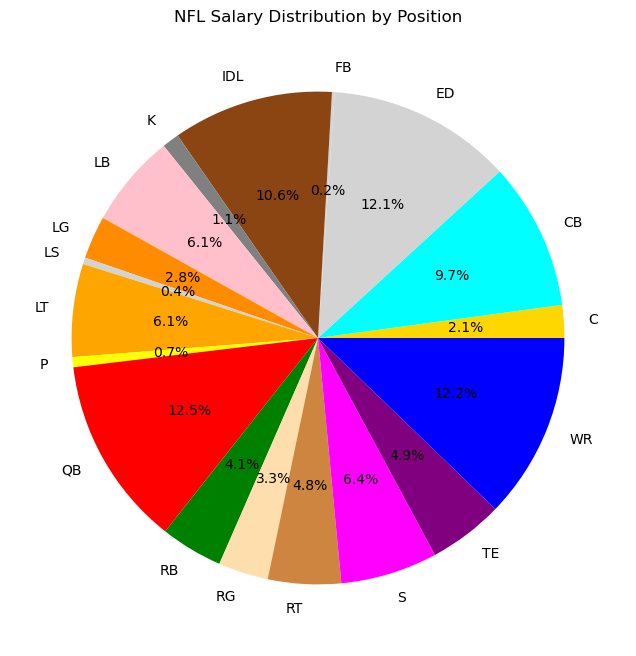

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(
    nfl_salary,
    labels=nfl_salary.index,
    colors=[position_colors.get(pos, "lightgray") for pos in nfl_salary.index],
    autopct="%1.1f%%",
)
plt.title("NFL Salary Distribution by Position")

While attempting to compare the two pie charts, I realized that a different visualization may be better for comparing this data. I decided that a grouped bar chart would be perfect for comparing the salary distribution at each position between the Panthers and the NFL.

## Better visualization to compare panthers to NFL

Normalized salary distributions to percentages of total team spending. This allows for fair comparison between the Panthers and the entirety of the NFL.

In [40]:
panthers_pct = panthers_salary / panthers_salary.sum() * 100
nfl_pct = nfl_salary / nfl_salary.sum() * 100

In [41]:
comparison_pct = pd.DataFrame({
    "Panthers": panthers_pct,
    "NFL": nfl_pct
}).fillna(0)

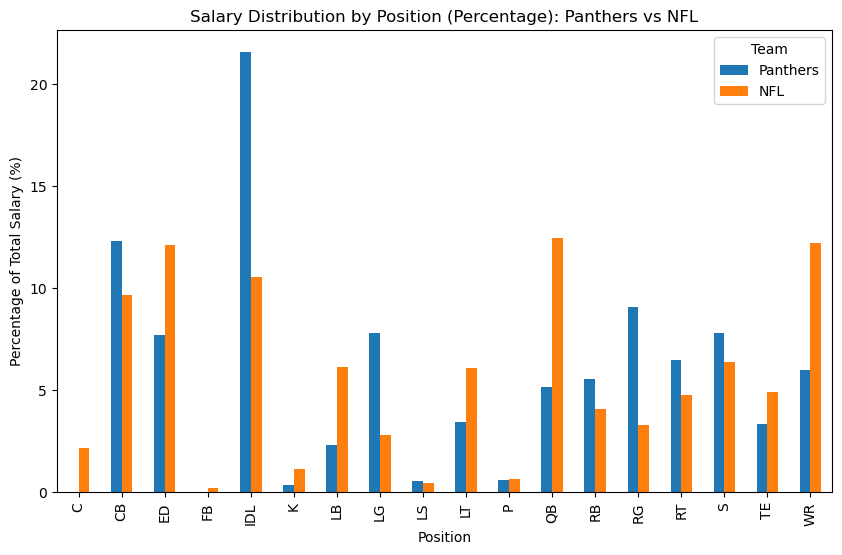

In [44]:
comparison_pct.plot(kind="bar", figsize=(10,6))

plt.title("Salary Distribution by Position (Percentage): Panthers vs NFL")
plt.ylabel("Percentage of Total Salary (%)")
plt.xlabel("Position")
plt.legend(title="Team")

-It appears that the Panthers have 0 money allocated towards the center position, but this is because their starting Center, Austin Corbett, is actually listed as an RG, which would, in turn, cause the RG salary allocation percentage to be much higher than it actually is. 

-You will also notice that the Panthers' IDL spending is almost double that of the league average. This is because Panthers star IDL Derrick Brown recently signed a contract that made him the 4th highest paid IDL (24 million APY) in the league. Other players like Tershawn Wharton, Bobby Brown III, and A’Shawn Robinson make up another 29 million APY in the IDL position.

-Another noticeable discrepancy is the lack of spending toward the LB position. Perhaps this lack of spending has contributed to the Panthers' inability to stop their opponents' run game, as they statistically had one of the worst rush defenses last season. 

-The Panthers spend significantly less money on QB's than average because Bryce Young is still on his rookie deal, which typically don't pay very high.

-We also spend significantly less on the WR position than league average, which may explain our lack of talent and performance from our WRs. While rookie 8th overall pick Tetairoa McMillan has high hopes of being a top WR in the league, perhaps the Panthers should look into acquiring a solidified free agent WR in the future offseason.